In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

In [2]:
lam = 0.4 #lambda
mu = 0.25 #mu
rho = 0.1 #discount factor
cost_a = 0.1 #attacking cost
cost_b = 0.2 #defending cost
theta = 0.01 #converge threshold
maxLength = 40

In [3]:
value = np.zeros([maxLength+1, maxLength+1])
policy_a = np.zeros([maxLength+1, maxLength+1])
policy_b = np.zeros([maxLength+1, maxLength+1])
policy_type = np.zeros([maxLength+1, maxLength+1])
while True:
    delta = 0
    for x in range(maxLength):
        for y in range(maxLength):
            v = value[x][y]
            d = lam*abs(value[x+1][y]-value[x][y+1])
            val = x+y+mu*(value[max(0,x-1)][y]+value[x][max(0,y-1)])+lam*min(value[x+1][y],value[x][y+1])
            if d < cost_a:
                value[x][y] = val
            else:
                if d < cost_b:
                    value[x][y] = val+d-cost_a
                else:
                    value[x][y] = val+cost_b*(1-cost_a/d)
            delta = max(delta, abs(v-value[x][y]))
    if delta<theta:
        break
for x in range(maxLength):
    for y in range(maxLength):
        d = lam*abs(value[x+1][y]-value[x][y+1])
        if d < cost_a:
            policy_a[x][y] = 0
            policy_b[x][y] = 0
            policy_type[x][y] = 0
        else:
            if d < cost_b:
                policy_a[x][y] = 1
                policy_b[x][y] = 0
                policy_type[x][y] = 1
            else:
                policy_a[x][y] = cost_b/d
                policy_b[x][y] = 1-cost_a/d
                policy_type[x][y] = 2

In [4]:
x_axis= []
for i in range(-15,16,2):
    x_axis.append(i)
print(x_axis)

[-15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15]


0.9440036901073282
0.9440036901073282


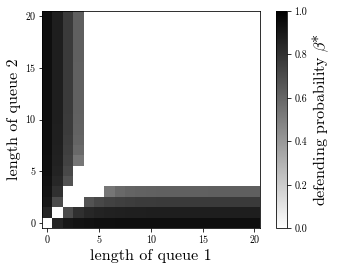

In [9]:
##### Z is your data set
N = int(maxLength/2+1)
B = policy_b[:N,:N]

# G is a NxNx3 matrix
G = np.zeros((N,N,3))

# Where we set the RGB for each pixel
# G[T == 0] = [1,0,0]
# G[T == 1] = [0,1,0]
# G[T == 2] = [0,0,1]

for i in range(N):
    for j in range(N):
        b_ij = B[i][j]
        G[i][j] = [1-b_ij,1-b_ij,1-b_ij]

print(B[0,15])
print(B[15,0])

plt.imshow(G,interpolation='nearest',cmap='gray_r',vmin=0,vmax=1)
plt.gca().invert_yaxis()
cbar = plt.colorbar(orientation="vertical")
cbar.set_label(r"defending probability $\beta$*",size =16)
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.xlabel(r'length of queue 1',size=16)
plt.ylabel(r'length of queue 2',size=16)
# plt.show()
plt.savefig("Fig8-2.pdf")

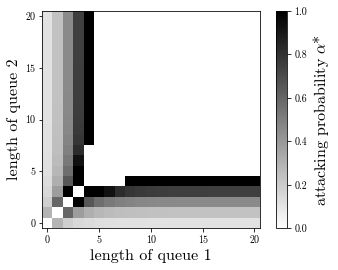

In [10]:
# Z is your data set
N = int(maxLength/2+1)
A = policy_a[:N,:N]

# G is a NxNx3 matrix
G = np.zeros((N,N,3))


for i in range(N):
    for j in range(N):
        a_ij = A[i][j]
        G[i][j] = [1-a_ij,1-a_ij,1-a_ij]


plt.imshow(G,interpolation='nearest',cmap='gray_r')
plt.gca().invert_yaxis()
cbar = plt.colorbar(orientation="vertical")
# cbar.ax.tick_params(labelsize=2) 
cbar.set_label(r"attacking probability $\alpha$*",size =16)
plt.yticks([y for y in range(N) if y % 5 == 0])
plt.xlabel(r'length of queue 1',size=16)
plt.ylabel(r'length of queue 2',size=16)
# plt.show()
plt.savefig("Fig8-1.pdf")